# 2-Model System IDS

## Overview: Creation of 2-Model System


---
## Project Workflow:
1. **Step 1: Install and Import Necessary Libraries**
2. **Step 2: Load Data**
3. **Step 3: Create 1st Model**
4. **Step 4: Create 2nd Model**
5. **Step 5: Test Model System**
6. **Step 6: Compare to Single Model**



# Step 1: Install and Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind



1.15.2


# Step 2: Load Data

In [3]:
#1st model
X_train = pd.read_csv("data/models/X_train.csv")
y_train = pd.read_csv("data/models/y_train.csv")
X_val = pd.read_csv("data/models/X_val.csv")
y_val = pd.read_csv("data/models/y_val.csv")
X_test = pd.read_csv("data/models/X_test.csv")
y_test = pd.read_csv("data/models/y_test.csv")

## Change all other traffic types besides BF to 'Other' Class


In [4]:
y_train['traffic_type'] = y_train['traffic_type'].apply(lambda x: 'Other' if x != 'BF' else x)
y_val['traffic_type'] = y_val['traffic_type'].apply(lambda x: 'Other' if x != 'BF' else x)
y_test['traffic_type'] = y_test['traffic_type'].apply(lambda x: 'Other' if x != 'BF' else x)



In [5]:
#2nd model
X_train2 = pd.read_csv("data/models/X_train2.csv")
y_train2 = pd.read_csv("data/models/y_train2.csv")
X_val2 = pd.read_csv("data/models/X_val2.csv")
y_val2 = pd.read_csv("data/models/y_val2.csv")
X_test2 = pd.read_csv("data/models/X_test2.csv")
y_test2 = pd.read_csv("data/models/y_test2.csv")

# Step 3: Create 1st Model

## Try Decision Tree

In [6]:
decTree = DecisionTreeClassifier() 
decTree.fit(X_train, y_train)
y_val_pred = decTree.predict(X_val)
print(classification_report(y_val, y_val_pred))

val_recall = recall_score(y_val, y_val_pred, average='macro')
print(f'Validation Recall: {val_recall}')

              precision    recall  f1-score   support

          BF       0.99      0.99      0.99      4071
       Other       1.00      1.00      1.00     11311

    accuracy                           1.00     15382
   macro avg       0.99      0.99      0.99     15382
weighted avg       1.00      1.00      1.00     15382

Validation Recall: 0.9948812607687336


### Tuning - uncomment

In [7]:
# new_decTree = RandomForestClassifier()

# grid = {
#     "max_depth": [10, 20],     
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2], 
#     "criterion": ["gini", "entropy"] 
# }

# gs = GridSearchCV(
#     estimator=new_decTree,
#     param_grid=grid,
#     scoring="f1_weighted", # imbalanced classes
#     cv=2,                 
#     verbose=2,
#     n_jobs=-1  
# )

# gs.fit(X_train, y_train)

# print("Best Hyperparameters:", gs.best_params_)



Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}, last 2 are default so ingore

### Final Decision Tree

In [8]:
Final_decTree = DecisionTreeClassifier(criterion='entropy', max_depth=20)     
Final_decTree.fit(X_train, y_train)
y_val_pred = Final_decTree.predict(X_val)
print(classification_report(y_val, y_val_pred))

val_recall = recall_score(y_val, y_val_pred, average='macro')
print(f'Validation Recall: {val_recall}')

              precision    recall  f1-score   support

          BF       0.99      0.99      0.99      4071
       Other       1.00      1.00      1.00     11311

    accuracy                           1.00     15382
   macro avg       1.00      1.00      1.00     15382
weighted avg       1.00      1.00      1.00     15382

Validation Recall: 0.9960356118990474


## Try Logistic Regression

In [9]:
logReg = LogisticRegression() 
logReg.fit(X_train, y_train)

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
y_val_pred = logReg.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

          BF       1.00      0.94      0.97      4071
       Other       0.98      1.00      0.99     11311

    accuracy                           0.98     15382
   macro avg       0.99      0.97      0.98     15382
weighted avg       0.98      0.98      0.98     15382



### Tuning - uncomment

In [11]:
# new_logReg = LogisticRegression()

# grid = {
#     'C': [0.1, 1, 10],
#     'solver': ['lbfgs', 'liblinear'],
#     'max_iter': [100, 200]
# }

# gs = GridSearchCV(new_logReg, grid, refit=True, verbose=2)

# gs.fit(X_train, y_train)

# y_val_pred = gs.predict(X_val)
# print(classification_report(y_val, y_val_pred))
# print("Best parameters found: ", gs.best_params_)



Best parameters found:  {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}

### Final Log Reg

In [12]:
logReg_final = LogisticRegression(C=0.1, max_iter=100, solver='lbfgs') 
logReg_final.fit(X_train, y_train)
y_val_pred = logReg_final.predict(X_val)
print(classification_report(y_val, y_val_pred))

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          BF       1.00      0.94      0.97      4071
       Other       0.98      1.00      0.99     11311

    accuracy                           0.98     15382
   macro avg       0.99      0.97      0.98     15382
weighted avg       0.98      0.98      0.98     15382



In [13]:
val_recall = recall_score(y_val, y_val_pred, average='macro')
print(f'Validation Recall: {val_recall}')

Validation Recall: 0.9684352738884795


### Result
- Logistic Regression tuning made no noticable change to the performance at the 2 decimal level
- the LogReg model type performs well

## Try SVM

In [14]:
svm = SVC()
svm.fit(X_train, y_train)

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [15]:
y_val_pred = svm.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

          BF       1.00      0.94      0.97      4071
       Other       0.98      1.00      0.99     11311

    accuracy                           0.98     15382
   macro avg       0.99      0.97      0.98     15382
weighted avg       0.98      0.98      0.98     15382



### Tuning - uncomment (high runtime)


In [16]:
# new_svm = SVC()

# grid = {
#     'C': [0.1, 1, 10],
#     'gamma': [1, 0.1],
#     'kernel': ['rbf', 'linear']
# }

# gs = GridSearchCV(new_svm, grid, refit=True, verbose=2)

# gs.fit(X_train, y_train)

# y_val_pred = gs.predict(X_val)
# print(classification_report(y_val, y_val_pred))
# print("Best parameters found: ", gs.best_params_)



Best parameters found:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

### Final SVM

In [17]:
svm_final = SVC(C = 10, gamma = 1, kernel = 'rbf')
svm_final.fit(X_train, y_train)
y_val_pred = svm_final.predict(X_val)
print(classification_report(y_val, y_val_pred))

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          BF       1.00      0.94      0.97      4071
       Other       0.98      1.00      0.99     11311

    accuracy                           0.98     15382
   macro avg       0.99      0.97      0.98     15382
weighted avg       0.98      0.98      0.98     15382



In [18]:
val_recall = recall_score(y_val, y_val_pred, average='macro')
print(f'Validation Recall: {val_recall}')

Validation Recall: 0.9716876190262744


## Results
- SVM tuning made no noticable change to the performance at the 2 decimal level
- the SVM model is extremely slow
- Decision tree fastest, better than Log Reg
- Although SVM outperforms slightly in Recall, I choose decision tree for runtime

# Step 4: Create 2nd Model

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(X_train2, y_train2)

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=5)

## Test with Validation

In [20]:
y_val_pred2 = rf_model.predict(X_val2)
print(classification_report(y_val2, y_val_pred2))

              precision    recall  f1-score   support

          BM       0.88      0.87      0.88      1249
          BN       0.98      0.99      0.98      7116
          CI       0.80      0.78      0.79      1358
       Mirai       0.94      0.83      0.88       203
         XSS       0.81      0.79      0.80      1345

    accuracy                           0.93     11271
   macro avg       0.88      0.85      0.87     11271
weighted avg       0.92      0.93      0.92     11271



## Hyperparameter Tuning - uncomment

In [21]:
# new_rf_model = RandomForestClassifier()

# grid = {
#     "n_estimators": [100, 200],
#     "max_depth": [10, 20],     
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2], 
#     "class_weight": [None, "balanced"] 
# }

# gs = GridSearchCV(
#     estimator=new_rf_model,
#     param_grid=grid,
#     scoring="f1_weighted", # imbalanced classes
#     cv=2,                 
#     verbose=2,
#     n_jobs=-1  
# )

# gs.fit(X_train2, y_train2)

# print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

## Final Model Validation Test

In [22]:
# with best hyperparameters
rf_model_final = RandomForestClassifier(n_estimators=200, random_state=5, class_weight="balanced", 
                                  max_depth=20, min_samples_split=2, min_samples_leaf=1)
rf_model_final.fit(X_train2, y_train2)

/Users/madelineshah/Documents/Clones/spring2025_VENV/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=5)

In [23]:
y_val_pred2 = rf_model_final.predict(X_val2)
val_recall2 = recall_score(y_val2, y_val_pred2, average='macro')
print(f'Validation Recall: {val_recall2}')
print(classification_report(y_val2, y_val_pred2))

Validation Recall: 0.8712913426285258
              precision    recall  f1-score   support

          BM       0.84      0.89      0.87      1249
          BN       0.98      0.98      0.98      7116
          CI       0.81      0.81      0.81      1358
       Mirai       0.86      0.88      0.87       203
         XSS       0.84      0.79      0.81      1345

    accuracy                           0.93     11271
   macro avg       0.87      0.87      0.87     11271
weighted avg       0.93      0.93      0.93     11271



# Step 5: Test Model System

## Classification Reports for Test Data

In [24]:
src_mac1 = X_test.pop("src_mac")  
src_mac2 = X_test2.pop("src_mac") 

In [25]:
y_test_pred1 = Final_decTree.predict(X_test)
y_test = y_test.squeeze()

y_test_pred2 = rf_model_final.predict(X_test2)
y_test2 = y_test2.squeeze()

# AI -----------------------------
test_results_binary = pd.DataFrame({
    "src_mac": src_mac1,
    "true_label": y_test,
    "predicted_label": y_test_pred1
})

test_results_multi = pd.DataFrame({
    "src_mac": src_mac2,
    "true_label": y_test2,
    "predicted_label": y_test_pred2
})

## Test Detection Effectiveness for Specific Classes

In [26]:
# AI -----------------------------
binary_brand_perf = test_results_binary.groupby("src_mac").apply(
    lambda group: classification_report(
        group["true_label"], 
        group["predicted_label"], 
        output_dict=True
    )
)

multi_brand_perf = test_results_multi.groupby("src_mac").apply(
    lambda group: classification_report(
        group["true_label"], 
        group["predicted_label"], 
        output_dict=True
    )
)

/var/folders/0_/p6_60b2d3r33yjj108yb0_7r0000gn/T/ipykernel_15247/1028789342.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  binary_brand_perf = test_results_binary.groupby("src_mac").apply(
/var/folders/0_/p6_60b2d3r33yjj108yb0_7r0000gn/T/ipykernel_15247/1028789342.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  multi_brand_perf = test_results_multi.groupby("src_mac").apply(


In [27]:
# AI -----------------------------
metrics = ['precision', 'recall', 'f1-score']
plot_data = []

for brand, performance in binary_brand_perf.items():
    precision = performance['weighted avg']['precision']
    recall = performance['weighted avg']['recall']
    f1 = performance['weighted avg']['f1-score']
    plot_data.append([brand, precision, recall, f1, 'Binary Logistic Regression'])

for brand, performance in multi_brand_perf.items():
    precision = performance['weighted avg']['precision']
    recall = performance['weighted avg']['recall']
    f1 = performance['weighted avg']['f1-score']
    plot_data.append([brand, precision, recall, f1, 'Random Forest'])


In [28]:
# convert to df
plot_df = pd.DataFrame(plot_data, columns=['src_mac', 'Precision', 'Recall', 'F1-Score', 'Model'])
plot2_df_melted = plot_df.melt(id_vars=['src_mac', 'Model'], var_name='Metric', value_name='Value')

## Test Detection Effectiveness for Specific Classes

In [29]:
binary_class_perf = classification_report(y_test, y_test_pred1, output_dict=True)
multi_class_perf = classification_report(y_test2, y_test_pred2, output_dict=True)

In [30]:
# AI -----------------------------
metrics = ['precision', 'recall', 'f1-score']
plot_data = []

for category, performance in binary_class_perf.items():
    if category in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    precision = performance['precision']
    recall = performance['recall']
    f1 = performance['f1-score']
    plot_data.append([category, precision, recall, f1, 'Binary Logistic Regression'])

for category, performance in multi_class_perf.items():
    if category in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    precision = performance['precision']
    recall = performance['recall']
    f1 = performance['f1-score']
    plot_data.append([category, precision, recall, f1, 'Random Forest'])


In [31]:
#Convert to df
plot_df = pd.DataFrame(plot_data, columns=['Category', 'Precision', 'Recall', 'F1-Score', 'Model'])
plot1_df_melted = plot_df.melt(id_vars=['Category', 'Model'], var_name='Metric', value_name='Value')

In [32]:
# remove other rows, only care about BF for model 1
plot1_df_melted = plot1_df_melted[plot1_df_melted['Category'] != 'Other']

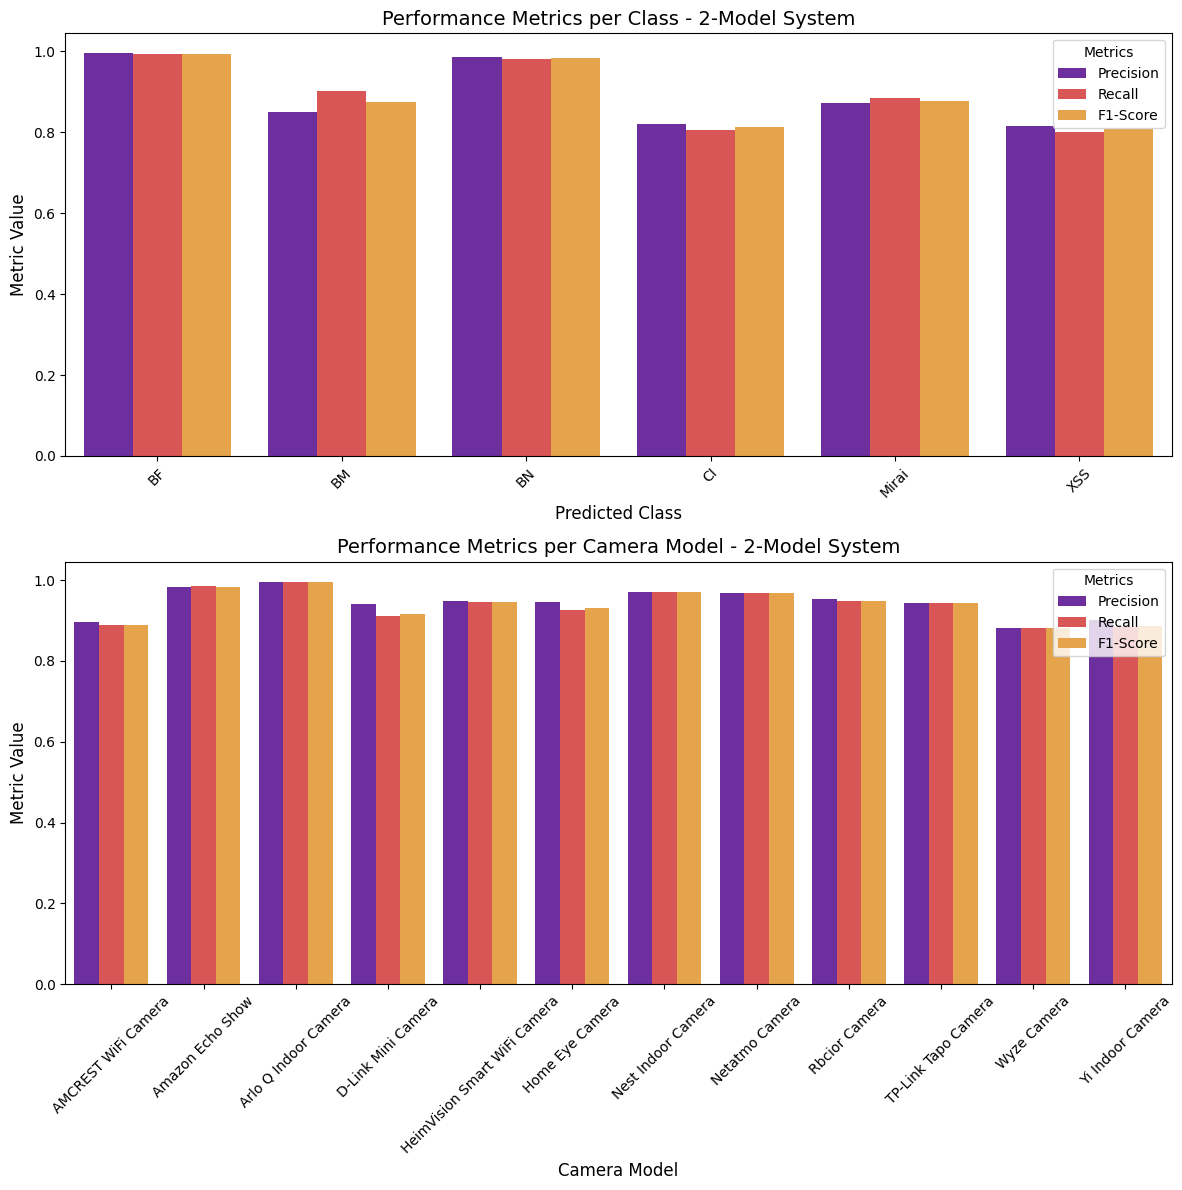

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

#plot 1 - class
sns.barplot(ax=axes[0], x='Category', y='Value', hue='Metric', data=plot1_df_melted, palette=['#711DB0', '#EF4040', '#FFA732'])
axes[0].set_title('Performance Metrics per Class - 2-Model System', fontsize=14)
axes[0].set_xlabel('Predicted Class', fontsize=12)
axes[0].set_ylabel('Metric Value', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].legend(title='Metrics', fontsize=10)

#plot 2 - devices
sns.barplot(ax=axes[1], x='src_mac', y='Value', hue='Metric', data=plot2_df_melted, palette=['#711DB0', '#EF4040', '#FFA732'], errorbar=None)
axes[1].set_title('Performance Metrics per Camera Model - 2-Model System', fontsize=14)
axes[1].set_xlabel('Camera Model', fontsize=12)
axes[1].set_ylabel('Metric Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].legend(title='Metrics', fontsize=10)

plt.tight_layout()

plt.savefig('plots/Combined_Metrics2.svg', format='svg')
plt.show()

## Save Data


In [34]:
plot1_df_melted.to_csv('data/twoM_class.csv', index=False)
plot2_df_melted.to_csv('data/twoM_devices.csv', index=False)

# Step 6: Compare to Single Model

## Load Single Model Data

In [35]:
single_classes = pd.read_csv("data/singleM_class.csv")
single_devices = pd.read_csv("data/singleM_devices.csv")

## Compare Class Recall

In [36]:
single_classes.rename(columns={'index': 'Category'}, inplace=True)
single_classes

,Category,Metric,Value
0,BF,precision,0.998994
1,BM,precision,0.845606
2,BN,precision,0.980092
3,CI,precision,0.763946
4,Mirai,precision,0.900433
5,XSS,precision,0.791898
6,BF,recall,0.981225
7,BM,recall,0.867587
8,BN,recall,0.979138
9,CI,recall,0.816134


In [37]:
plot1_df_melted

,Category,Model,Metric,Value
0,BF,Binary Logistic Regression,Precision,0.994811
2,BM,Random Forest,Precision,0.850769
3,BN,Random Forest,Precision,0.985530
4,CI,Random Forest,Precision,0.821249
5,Mirai,Random Forest,Precision,0.872038
6,XSS,Random Forest,Precision,0.814400
7,BF,Binary Logistic Regression,Recall,0.994565
9,BM,Random Forest,Recall,0.902857
10,BN,Random Forest,Recall,0.981531
11,CI,Random Forest,Recall,0.804501


In [38]:
# only care for recall
single_classes_recall = single_classes[single_classes['Metric'] == 'recall']
plot1_df_melted_recall = plot1_df_melted[plot1_df_melted['Metric'] == 'Recall']

#code which system it is
single_classes_recall['System'] = 1
plot1_df_melted_recall['System'] = 2


/var/folders/0_/p6_60b2d3r33yjj108yb0_7r0000gn/T/ipykernel_15247/3937167587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_classes_recall['System'] = 1
/var/folders/0_/p6_60b2d3r33yjj108yb0_7r0000gn/T/ipykernel_15247/3937167587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot1_df_melted_recall['System'] = 2


In [39]:
single_classes_recall = single_classes_recall[['Category', 'Metric', 'Value', 'System']]
plot1_df_melted_recall = plot1_df_melted_recall[['Category', 'Metric', 'Value', 'System']]

# Combine dataframes
combined_df = pd.concat([single_classes_recall, plot1_df_melted_recall], ignore_index=True)

combined_df

,Category,Metric,Value,System
0,BF,recall,0.981225,1
1,BM,recall,0.867587,1
2,BN,recall,0.979138,1
3,CI,recall,0.816134,1
4,Mirai,recall,0.881356,1
5,XSS,recall,0.766334,1
6,BF,Recall,0.994565,2
7,BM,Recall,0.902857,2
8,BN,Recall,0.981531,2
9,CI,Recall,0.804501,2


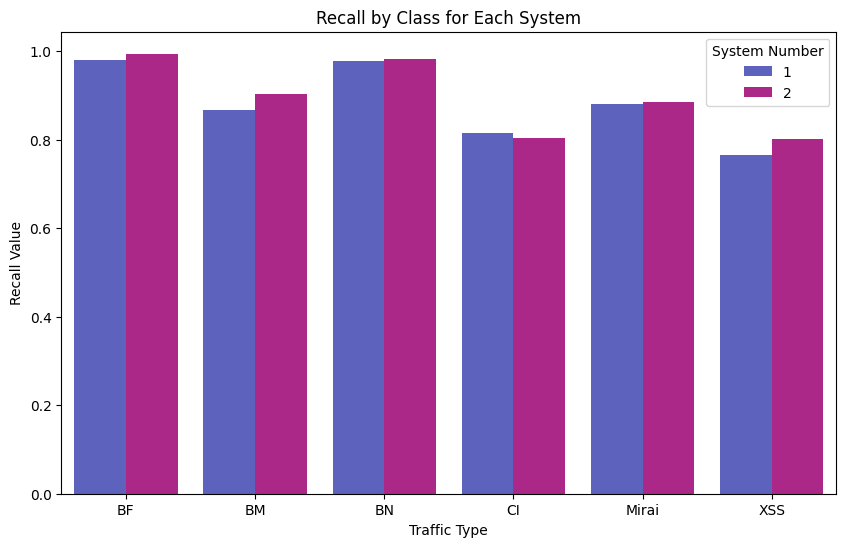

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Value', hue='System', data=combined_df, palette={1: '#4D55CC', 2: '#C21292'})
plt.title('Recall by Class for Each System')
plt.xlabel('Traffic Type')
plt.ylabel('Recall Value')
plt.legend(title='System Number')

plt.savefig('plots/Comparison.svg', format='svg')
plt.show()